# Feature Extraction

In this notebook, we will extract some features from the EEG signals

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("..")

In [2]:
%matplotlib inline
from IPython.core.debugger import Tracer
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

df = pd.read_csv("output/output.csv")



In [3]:
index = 6

instance = df.iloc[index]

In [4]:

arr = np.load(instance.array_path)
arr.shape

(15, 104)

In [5]:
t = np.arange(-0.11, 0.7, 1.0/128.0)

len(t)

104

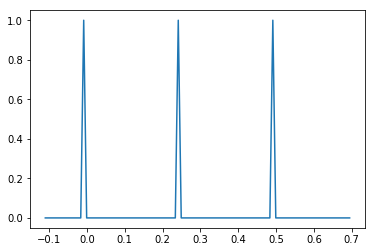

In [6]:
plt.plot(t, arr[14, :])


In [7]:
from scipy import signal

In [8]:
help(signal.welch)

Help on function welch in module scipy.signal.spectral:

welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
    Estimate power spectral density using Welch's method.
    
    Welch's method [1]_ computes an estimate of the power spectral
    density by dividing the data into overlapping segments, computing a
    modified periodogram for each segment and averaging the
    periodograms.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. See `get_window` for a list of windows
        and required parameters. If `window` is array_like it will be
        used directly as the window and its length must be nperseg.
        Defaults to a Hann window.
    nperseg : int, optional
        Len

In [13]:
freqs, amplitudes = signal.welch(arr[10, :], fs=128, nperseg=65)

print(amplitudes.shape)

(33,)


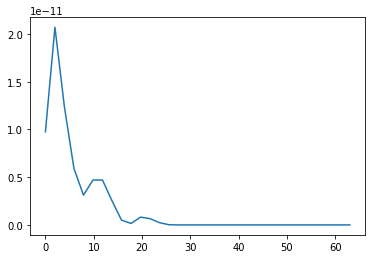

In [14]:
plt.plot(freqs, amplitudes)

Perfecto, las magnitudes arriba de 20 son nulas.

# Calculando todas al mismo tiempo

Veamos si signal.welch hace lo mismo si le mando todos los canales de una

In [15]:
freqs, amplitudes = signal.welch(arr, fs=128, nperseg=65)

print(amplitudes.shape)

(15, 33)


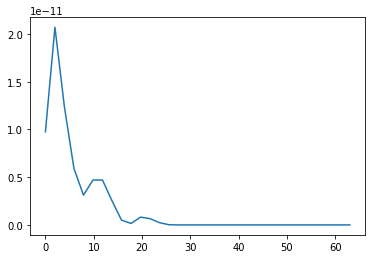

In [16]:
plt.plot(freqs, amplitudes[10, :])

# Converting to 1-d vector

In [28]:
amplitudes[0, :]

array([  1.00534844e-12,   1.05424532e-11,   1.22139255e-11,
         9.99979160e-12,   1.82319638e-12,   1.38413858e-12,
         1.20558664e-12,   1.63883739e-12,   1.86017125e-12,
         1.22574355e-13,   3.45898227e-13,   2.02913055e-13,
         7.76559060e-14,   2.92324600e-15,   1.55752234e-17,
         2.65933958e-18,   1.07760967e-18,   5.87372373e-19,
         3.54359502e-19,   2.27201361e-19,   1.51747052e-19,
         1.02353781e-19,   7.19551051e-20,   5.05739238e-20,
         3.62884343e-20,   2.63031700e-20,   1.92413450e-20,
         1.42025302e-20,   1.06337405e-20,   8.10861597e-21,
         6.42678346e-21,   5.36085830e-21,   4.86447485e-21])

In [26]:
amplitudes.flatten()

array([  1.00534844e-12,   1.05424532e-11,   1.22139255e-11,
         9.99979160e-12,   1.82319638e-12,   1.38413858e-12,
         1.20558664e-12,   1.63883739e-12,   1.86017125e-12,
         1.22574355e-13,   3.45898227e-13,   2.02913055e-13,
         7.76559060e-14,   2.92324600e-15,   1.55752234e-17,
         2.65933958e-18,   1.07760967e-18,   5.87372373e-19,
         3.54359502e-19,   2.27201361e-19,   1.51747052e-19,
         1.02353781e-19,   7.19551051e-20,   5.05739238e-20,
         3.62884343e-20,   2.63031700e-20,   1.92413450e-20,
         1.42025302e-20,   1.06337405e-20,   8.10861597e-21,
         6.42678346e-21,   5.36085830e-21,   4.86447485e-21,
         1.26629855e-10,   2.51222604e-10,   4.95768004e-11,
         1.47573346e-11,   3.11369863e-12,   1.92577798e-12,
         1.83596863e-12,   4.08765455e-12,   1.15203201e-12,
         1.84710753e-12,   1.47240197e-12,   1.06767406e-12,
         9.08846178e-14,   1.84090303e-14,   1.29351173e-16,
         2.44799267e-17,